# 크롤링

### 인터넷에서 정보 수집 
- SNS , 웹사이트

### 크롤링
- 스크레이핑  : 인간 사용자를 위해 제공된 웹페이지
- API 기반 정보수집 : 프로그램을 위한 정보 제공  API가 존재

# Naver crawling

## 개발자 센터 가입

http://developers.naver.com

- 이용 순서 : 서비스 API 선택  ->  오픈 api 이용 신청 -> 어플리케이션 등록



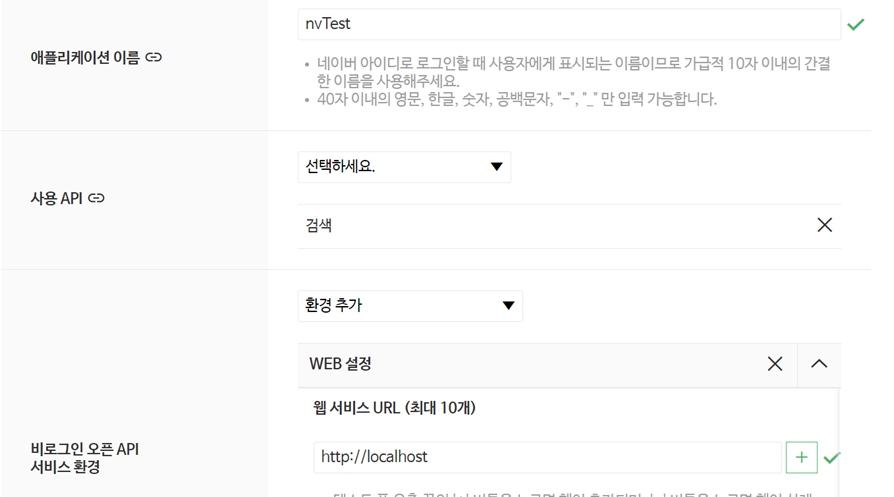



- 획득한 토큰

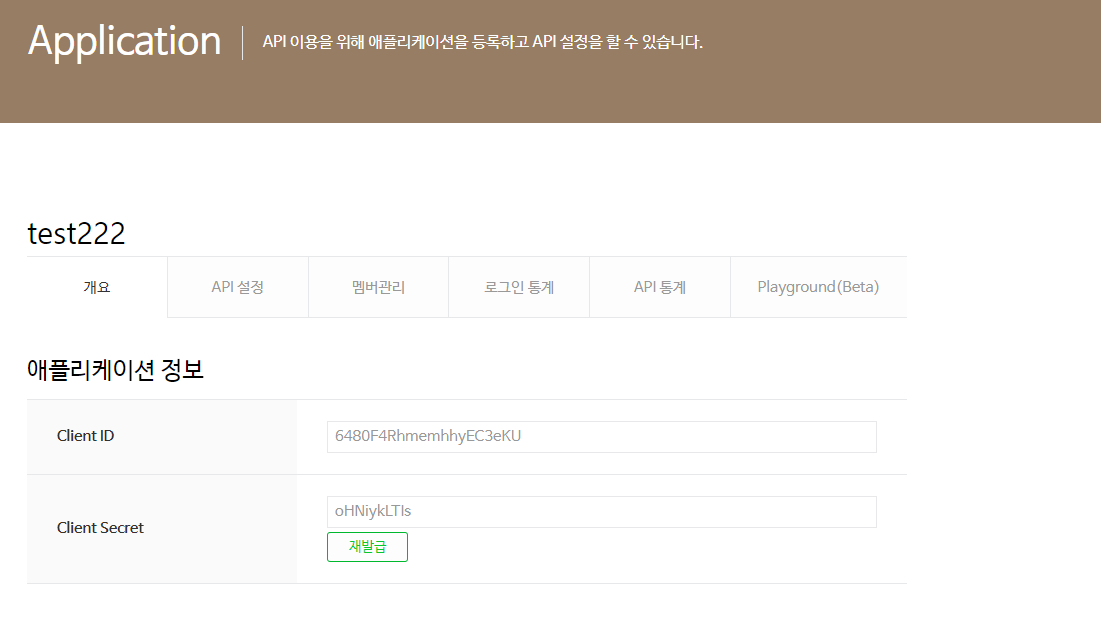



## id와 키 설정



In [1]:
import os
import sys

import datetime
import time
import json

# 반드시 자기 id 로  넣기 
client_id = 'T2HQvSmvlDFHS8oH90Wi'
client_secret = 'KdaEf3xmRk'

LEC=True

네이버 크롤링 구조

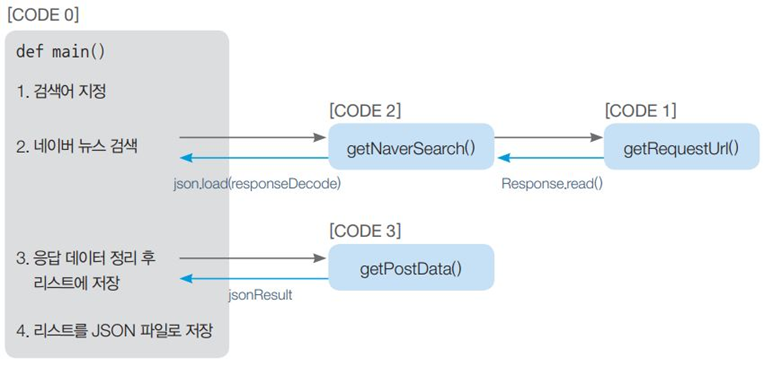


## urllib  

- 헤더에 id, secret 포함 필요



In [2]:
import urllib.request

def getRequestUrl(url):    
    req = urllib.request.Request(url)
    req.add_header("X-Naver-Client-Id", client_id)
    req.add_header("X-Naver-Client-Secret", client_secret)
    
    try: 
        response = urllib.request.urlopen(req)
        if response.getcode() == 200:
            print ("[%s] Url Request Success" % datetime.datetime.now())
            return response.read().decode('utf-8')
        
    except Exception as e:
        print(e)
        print("[%s] Error for URL : %s" % (datetime.datetime.now(), url))
        return None

- url 구성

https://developers.naver.com/docs/search/blog/ 참조



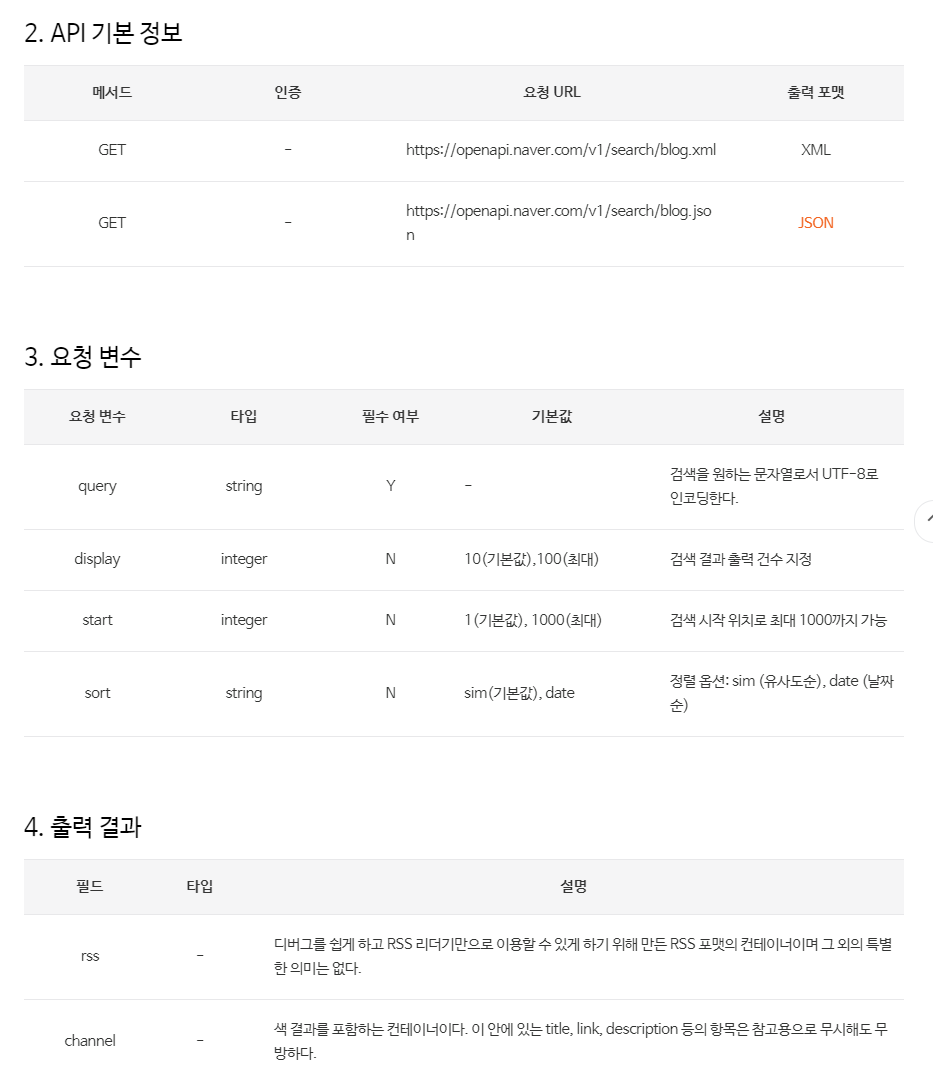

In [3]:
if LEC:
    q= urllib.parse.quote("인공지능")  # url coding
    
    url = "https://openapi.naver.com/v1/search/blog.json?query=%s&display=10"%q
    print (url)
    resp = getRequestUrl(url)

    print (resp)


https://openapi.naver.com/v1/search/blog.json?query=%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5&display=10
[2022-03-22 09:13:52.215699] Url Request Success
{
"lastBuildDate": "Tue, 22 Mar 2022 09:13:50 +0900",
"total": 1351091,
"start": 1,
"display": 10,
"items": [
{
"title": "지능형 응급의료시스템 '<b>인공지능</b>(AI) 구급차'로 골든타임 지킨다",
"link": "https:\/\/blog.naver.com\/mcst_pr?Redirect=Log&logNo=222668719827",
"description": "2019년부터 2020년까지 2년여에 걸쳐 ▲중증도 분류 ▲구급일지 자동작성 지원 ▲최적 이송 병원 선정 지원 등 8가지 지능형 응급의료서비스 개발에 성공했습니다. <b>인공지능</b> 구급차에서 응급의료시스템을 점검... ",
"bloggername": "<공감> 공식 블로그",
"bloggerlink": "https://blog.naver.com/mcst_pr",
"postdate": "20220310"

},
{
"title": "<b>인공지능</b>이 만든 3D 단백질 모델, 백신 개발 기간 단축할까",
"link": "https:\/\/blog.naver.com\/tech-plus?Redirect=Log&logNo=222643058817",
"description": "인공적으로 특정 바이러스에 대한 항체를 합성하기 위해서는 수백만 가지 조합의 단백질 복합체를 생성하고 분석해야 한다. 따라서 정확한 표본을 찾는 데에 많은 시간이 소요된다. 이퀴덕 <b>인공지능</b>... ",
"bloggername": "테크플러스",
"bloggerlink": "https://blog.naver.com/tech-plus",
"postdate": 

## json load 

string인 결과를 객체로 loading하여 처리 

In [4]:
def getNaverSearch(node, srcText, start, display):    
    base = "https://openapi.naver.com/v1/search"
    node = "/%s.json" % node
    parameters = "?query=%s&start=%s&display=%s" % (urllib.parse.quote(srcText), start, display)
    
    url = base + node + parameters    
    responseDecode = getRequestUrl(url)   #[CODE 1]
    
    if (responseDecode == None):
        return None
    else:
        return json.loads(responseDecode) # json decode

In [5]:
if LEC :
    jobj=getNaverSearch("blog", "인공지능", 10, 2)
    print(  jobj['items'] )

[2022-03-22 09:19:55.889028] Url Request Success
[{'title': '소중한 생명 지킴이, <b>인공지능</b> 구급차!', 'link': 'https://blog.naver.com/with_msip?Redirect=Log&logNo=222618808216', 'description': '<b>인공지능</b> 구급차의 핵심은 기존 응급의료체계의 기술적, 시간적, 공간적 한계를 극복하는 지능형 응급의료시스템을 개발하고 보급하는 것입니다. 즉 응급환자의 데이터를 송수신하고, 골든타임을 지키며... ', 'bloggername': '과학기술정보통신부 블로그', 'bloggerlink': 'https://blog.naver.com/with_msip', 'postdate': '20220111'}, {'title': '<b>인공지능</b> 기반 미세먼지 대응 시스템 구축 등 첨단정보기술을... ', 'link': 'https://blog.naver.com/mopaspr?Redirect=Log&logNo=222667006059', 'description': '및 지능형 지원체계를 확보하기 위하여 ‘개방형 응급상황 공유플랫폼’을 구축합니다. 재난 시 상황실의 신속한 대응을 위하여 <b>인공지능</b> 기반의 실시간 분석·대응서비스를 구축하고, 음성인식을 통해서... ', 'bloggername': '대한민국 행정안전부', 'bloggerlink': 'https://blog.naver.com/mopaspr', 'postdate': '20220308'}]


## 결과 가공

- 필요한 필드만, 하나씩

In [6]:
def getPostData(post, jsonResult, cnt):    
    title = post['title']
    description = post['description']
    org_link = post['originallink']
    link = post['link']
    
    pDate = datetime.datetime.strptime(post['pubDate'],  '%a, %d %b %Y %H:%M:%S +0900')
    pDate = pDate.strftime('%Y-%m-%d %H:%M:%S')
    
    jsonResult.append({'cnt':cnt, 'title':title, 'description': description, 
'org_link':org_link,   'link': org_link,   'pDate':pDate})
    return    

In [7]:
if LEC:
    p=[]
    jobj=getNaverSearch("news", "인공지능", 10, 1)
    #print (jobj)
    getPostData( jobj['items'][0], p, 1 )
    print (p)

[2022-03-22 09:24:28.133894] Url Request Success
[{'cnt': 1, 'title': 'KT‧신한은행, 금융 DX 선도 위한 AI 인재 육성 맞손', 'description': 'KT는 22일 신한은행과 <b>인공지능</b>(AI) 인재양성 분야 협력을 강화하고 미래 금융 디지털 전환(DX) 선도에 박차를 가한다고 밝혔다. 양사는 지난 1월 미래 성장 DX 사업을 위해 전략적 파트너십을 맺고 금융 디지털 전환과... ', 'org_link': 'https://www.ebn.co.kr/news/view/1523949/?sc=Naver', 'link': 'https://www.ebn.co.kr/news/view/1523949/?sc=Naver', 'pDate': '2022-03-22 09:16:00'}]


In [9]:

def main():
    node = 'news'   # 크롤링 할 대상
    srcText = input('검색어를 입력하세요: ')
    cnt = 0
    jsonResult = []

    jsonResponse = getNaverSearch(node, srcText, 1, 100) 
    total = jsonResponse['total']
    print (total)
 
    while ((jsonResponse != None) and (jsonResponse['display'] != 0)):         
        for post in jsonResponse['items']:
            cnt += 1
            getPostData(post, jsonResult, cnt)      
        
        start = jsonResponse['start'] + jsonResponse['display']
        jsonResponse = getNaverSearch(node, srcText, start, 100) 
       
    print('전체 검색 : %d 건' %total)
    
    with open('%s_naver_%s.json' % (srcText, node), 'w', encoding='utf8') as outfile:
        jsonFile = json.dumps(jsonResult,  indent=4, sort_keys=True,  ensure_ascii=False)
                        
        outfile.write(jsonFile)
        
    print("가져온 데이터 : %d 건" %(cnt))
    print ('%s_naver_%s.json SAVED' % (srcText, node))
    
if __name__ == '__main__':
    main()

검색어를 입력하세요: 인공지능
[2022-03-22 09:31:36.830243] Url Request Success
1369713
[2022-03-22 09:31:36.980724] Url Request Success
[2022-03-22 09:31:37.134658] Url Request Success
[2022-03-22 09:31:37.281430] Url Request Success
[2022-03-22 09:31:37.442724] Url Request Success
[2022-03-22 09:31:37.747422] Url Request Success
[2022-03-22 09:31:37.897949] Url Request Success
[2022-03-22 09:31:38.037628] Url Request Success
[2022-03-22 09:31:38.199937] Url Request Success
[2022-03-22 09:31:38.334954] Url Request Success
HTTP Error 400: Bad Request
[2022-03-22 09:31:39.524588] Error for URL : https://openapi.naver.com/v1/search/news.json?query=%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5&start=1001&display=100
전체 검색 : 1369713 건
가져온 데이터 : 1000 건
인공지능_naver_news.json SAVED


## 과제1 : 뉴스 검색, "빅데이터", 유사도순, 1~110번 제목만 출력 
- 과제 제출 방법 :  HW-03.ipynb 를 제출 
    - HW-강의주차.ipynb
    - 필요한 코드 모두 포함, 입출력 파일은 필요없음



# Facebook API 활용

## OAuth

특정 사용자의 동의를 얻어 사용자의 정보를 가져오는데 주로 활용

- 기본 구조

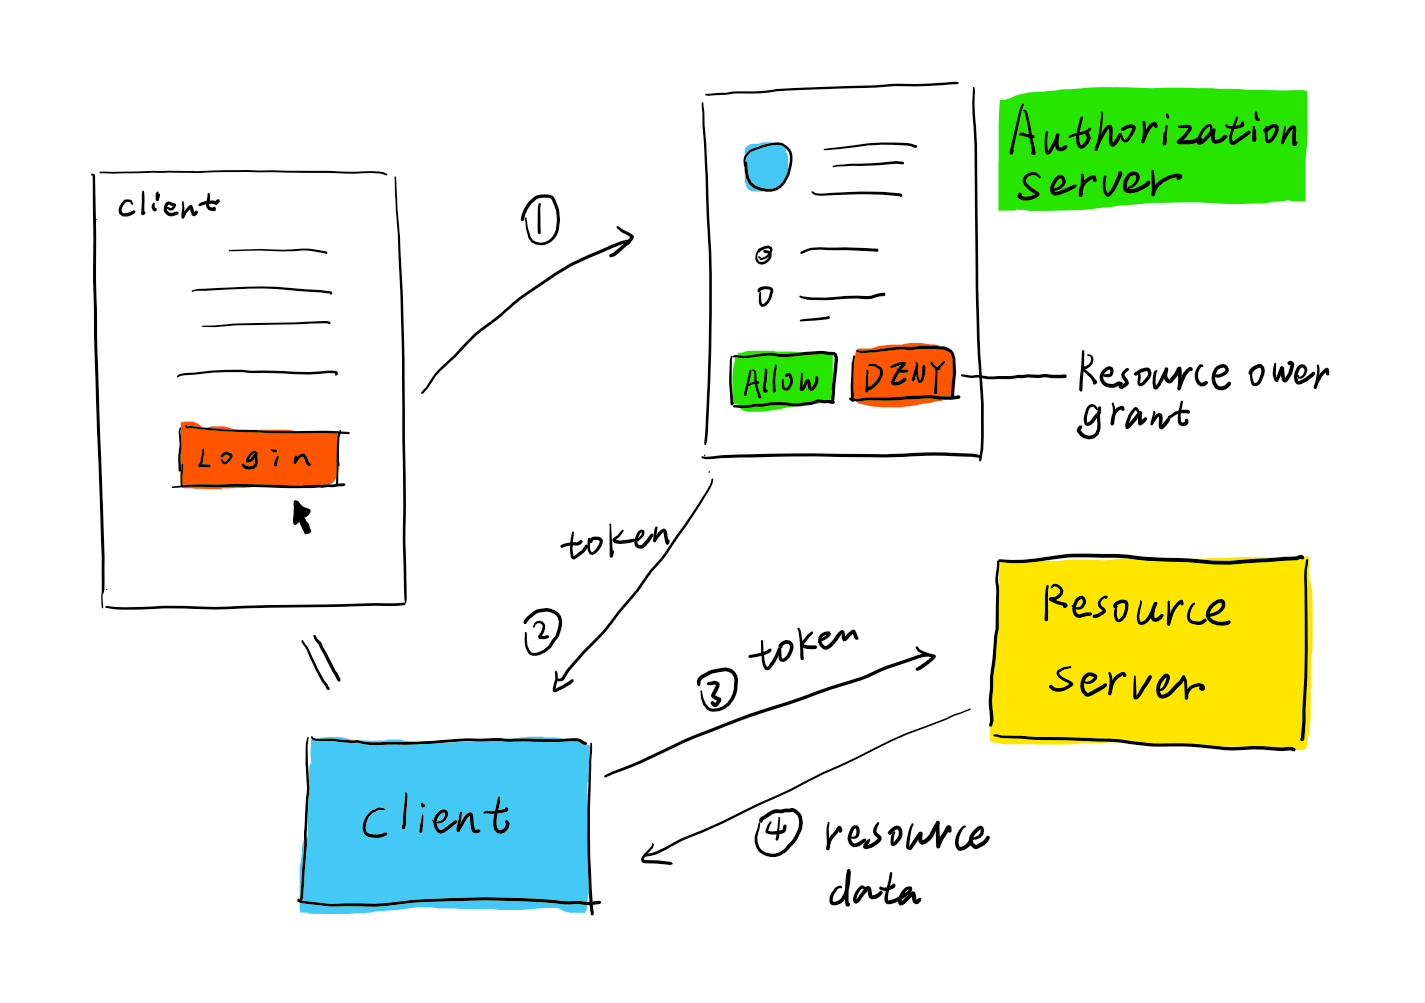

- 상세구조

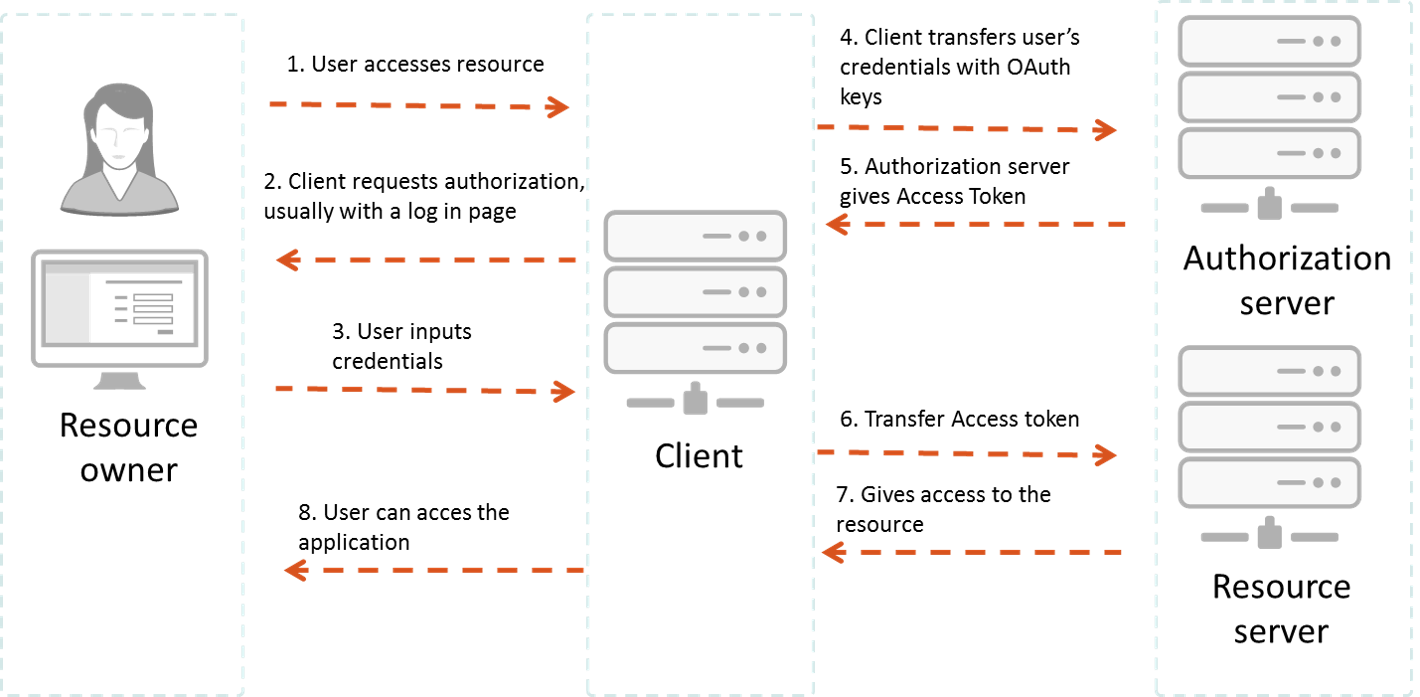

- 개발 흐름 : user token (동의) 확보 -> api에 user token 포함하여 호출

## Meta 개발자 등록, app 등록

- facebook 계정 필요
- https://developers.facebook.com/apps/create


앱만들기 -> 앱유형 : 비즈니스   -> 기본정보제공
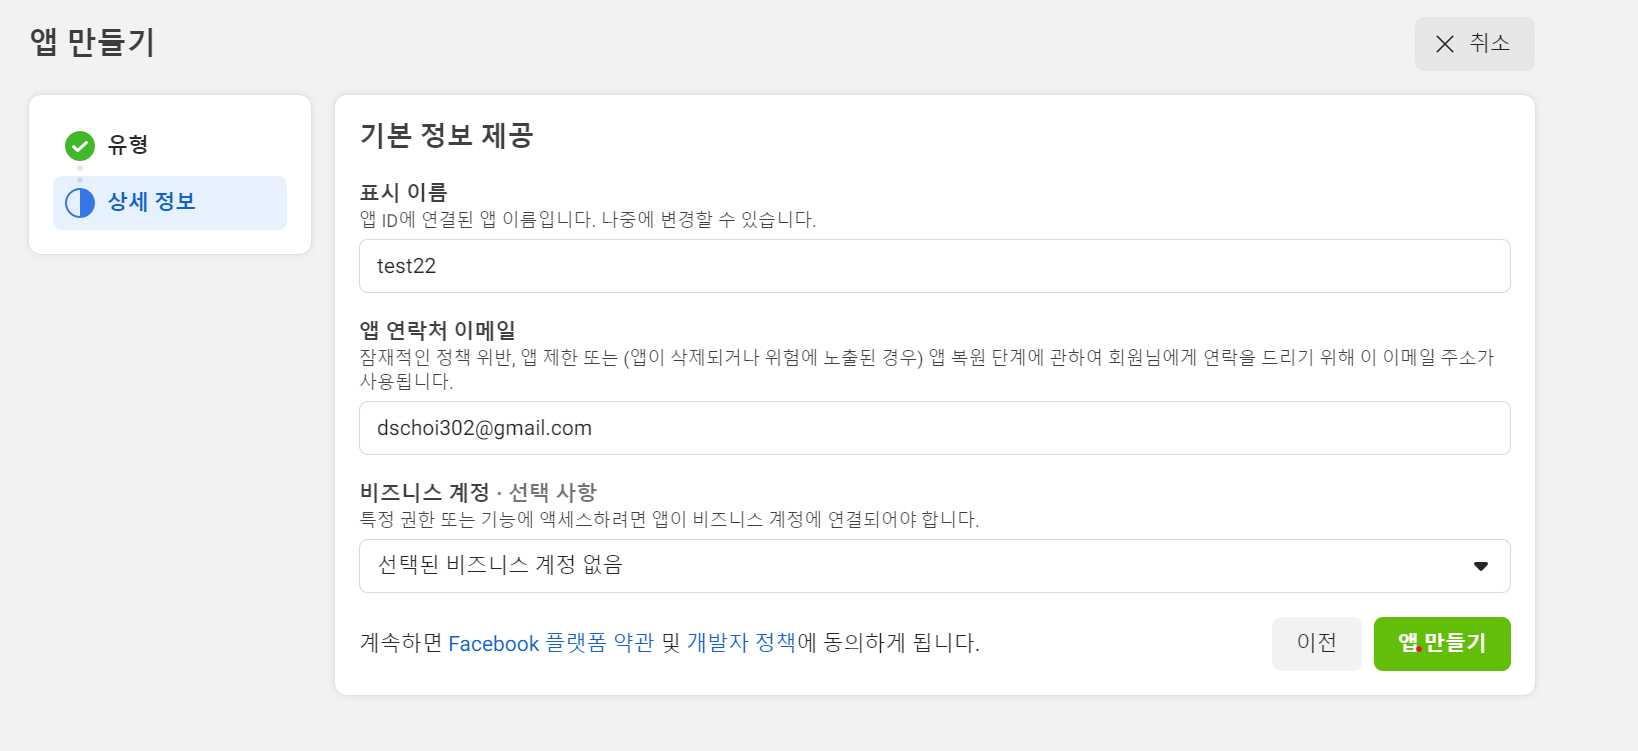

- 테스트앱 만들기 : 모든 권한 테스트 가능 ( 테스트앱이 아닌 경우, 검수를 받아야만 함)

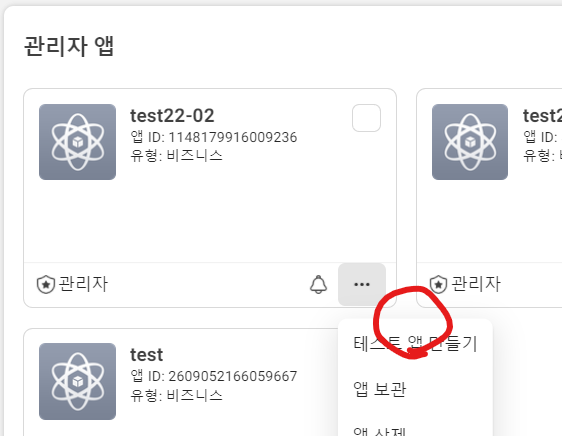

## API 테스트  : API 탐색기

- 메뉴: 도구-그래프API탐색기
    - 기본 실행

- 권한 추가 : 추가 -> 토큰 갱신

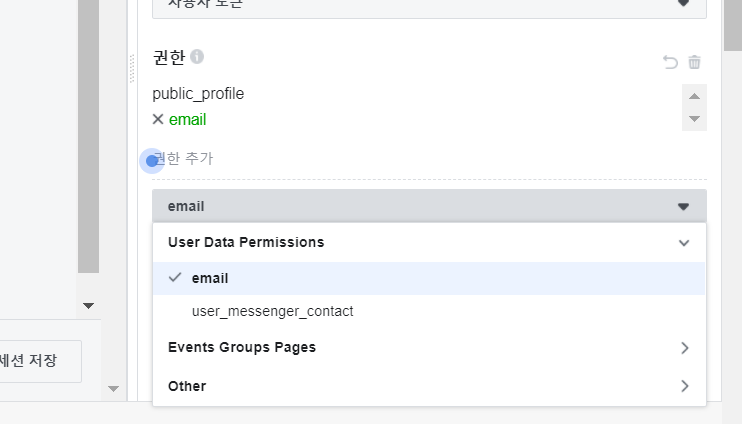



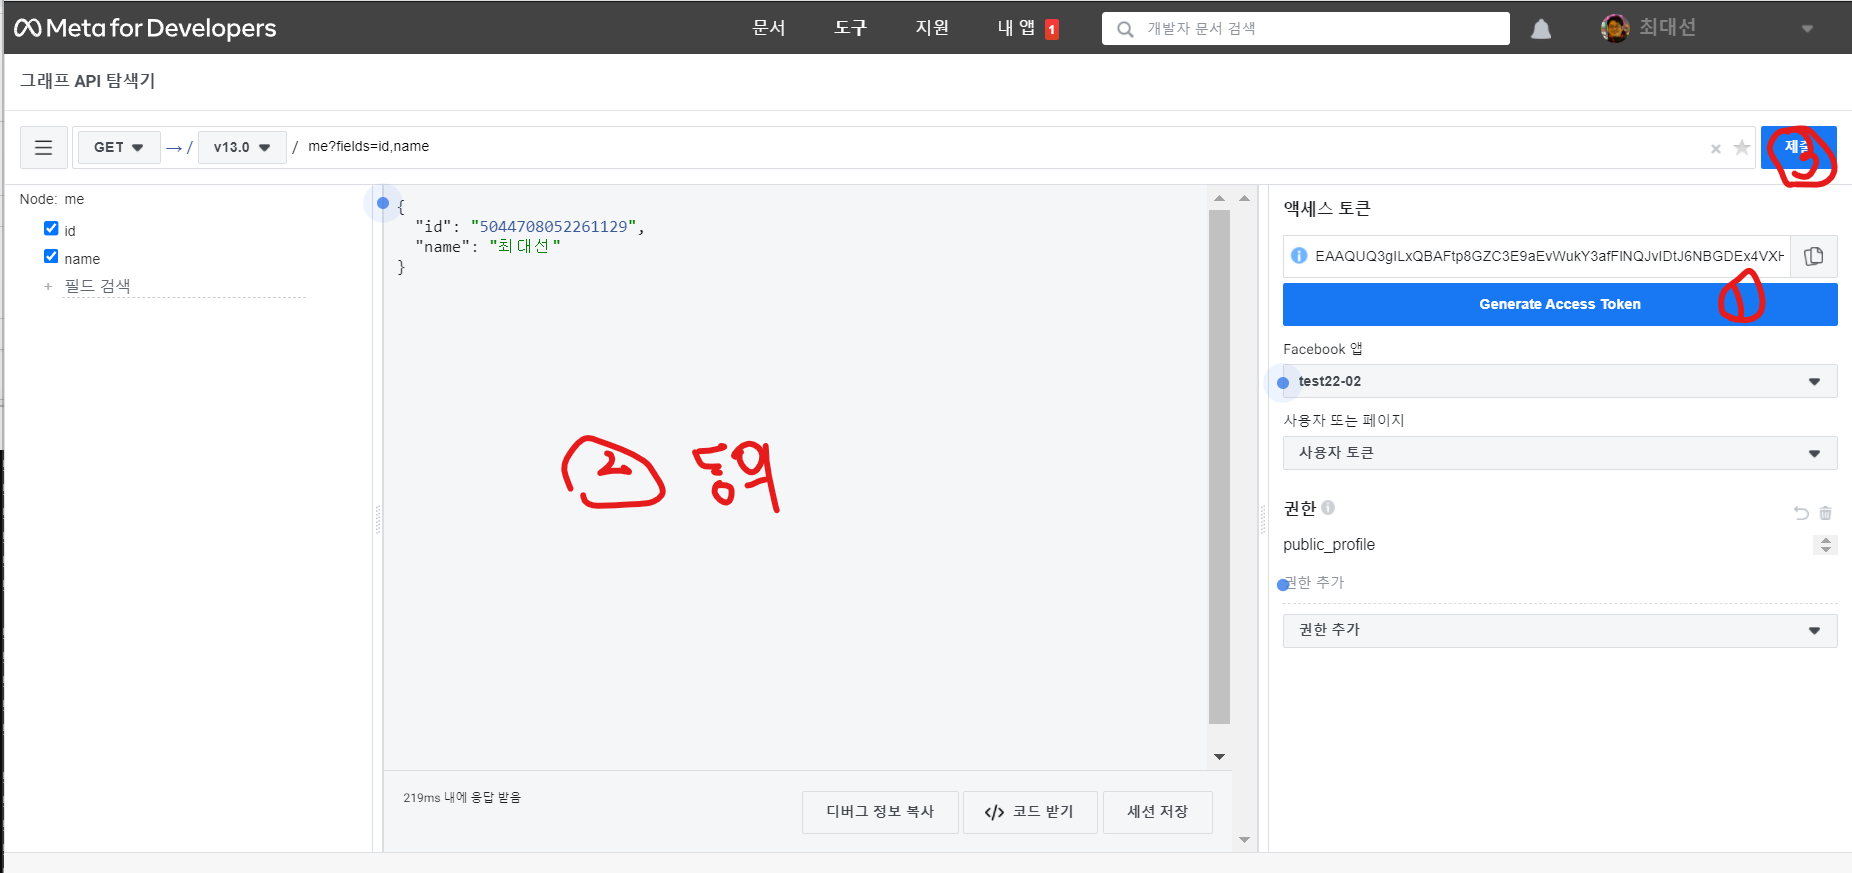



## 다른 사용자 정보 조회

- 테스트 사용자

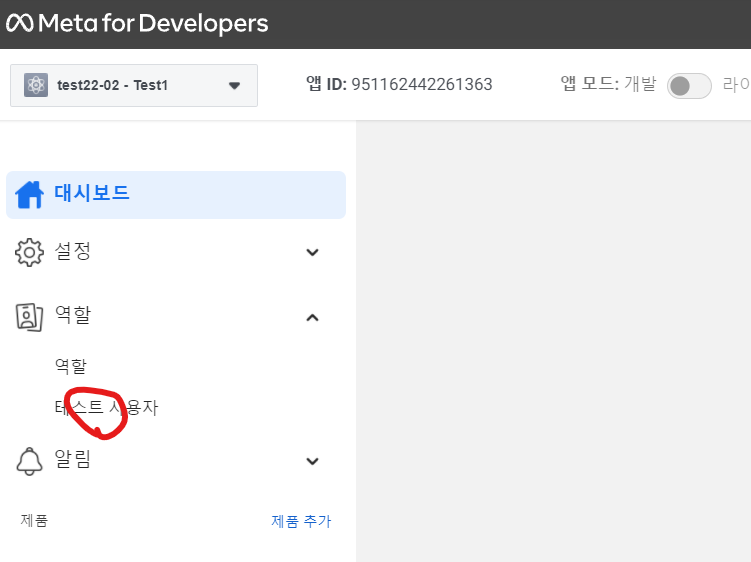

- 액세스 토큰 및 권한
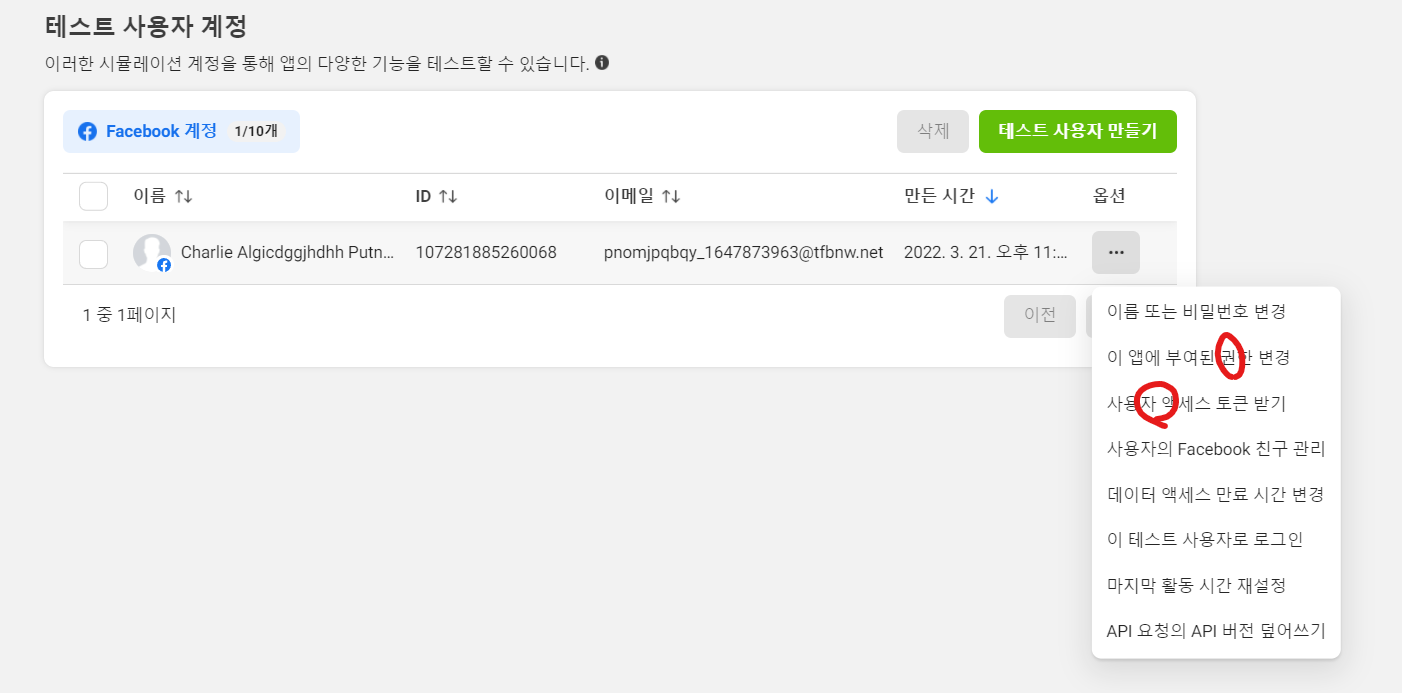

### Access token 확장 (유효기간 연장)

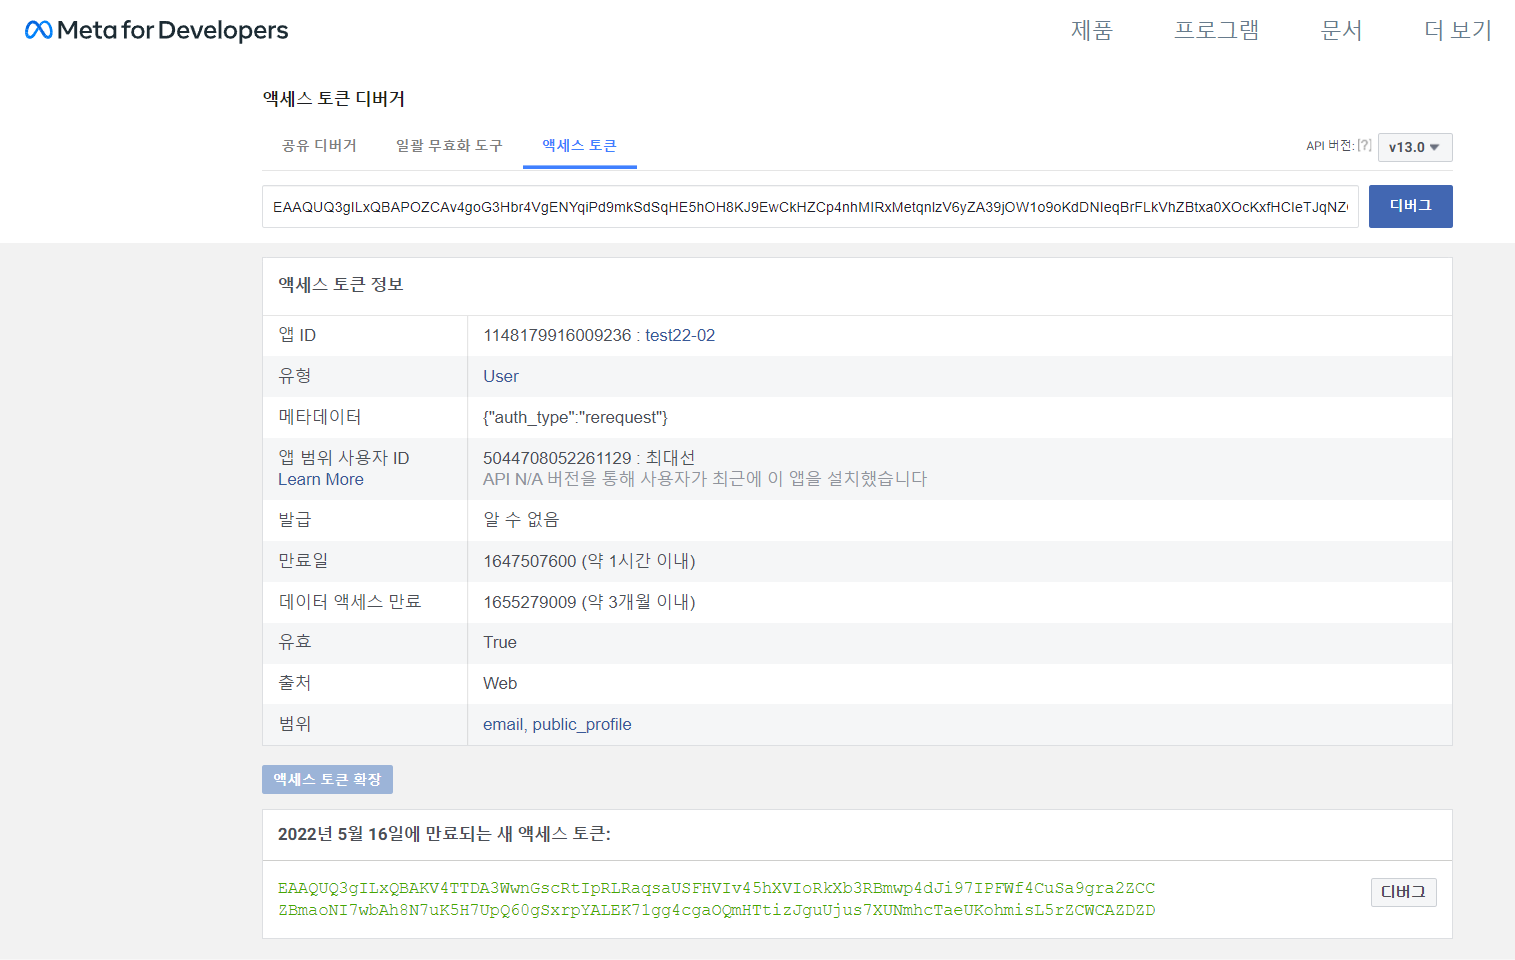



## 과제2 : 테스트 유저의 birthday 출력하기

- 화면 캡처 제출 (아래 예)

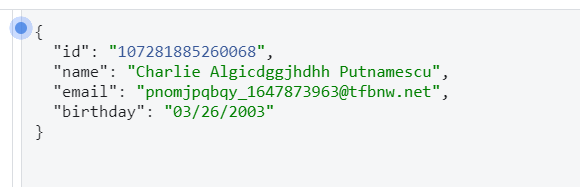 


## API 코드
### facebook sdk 설치

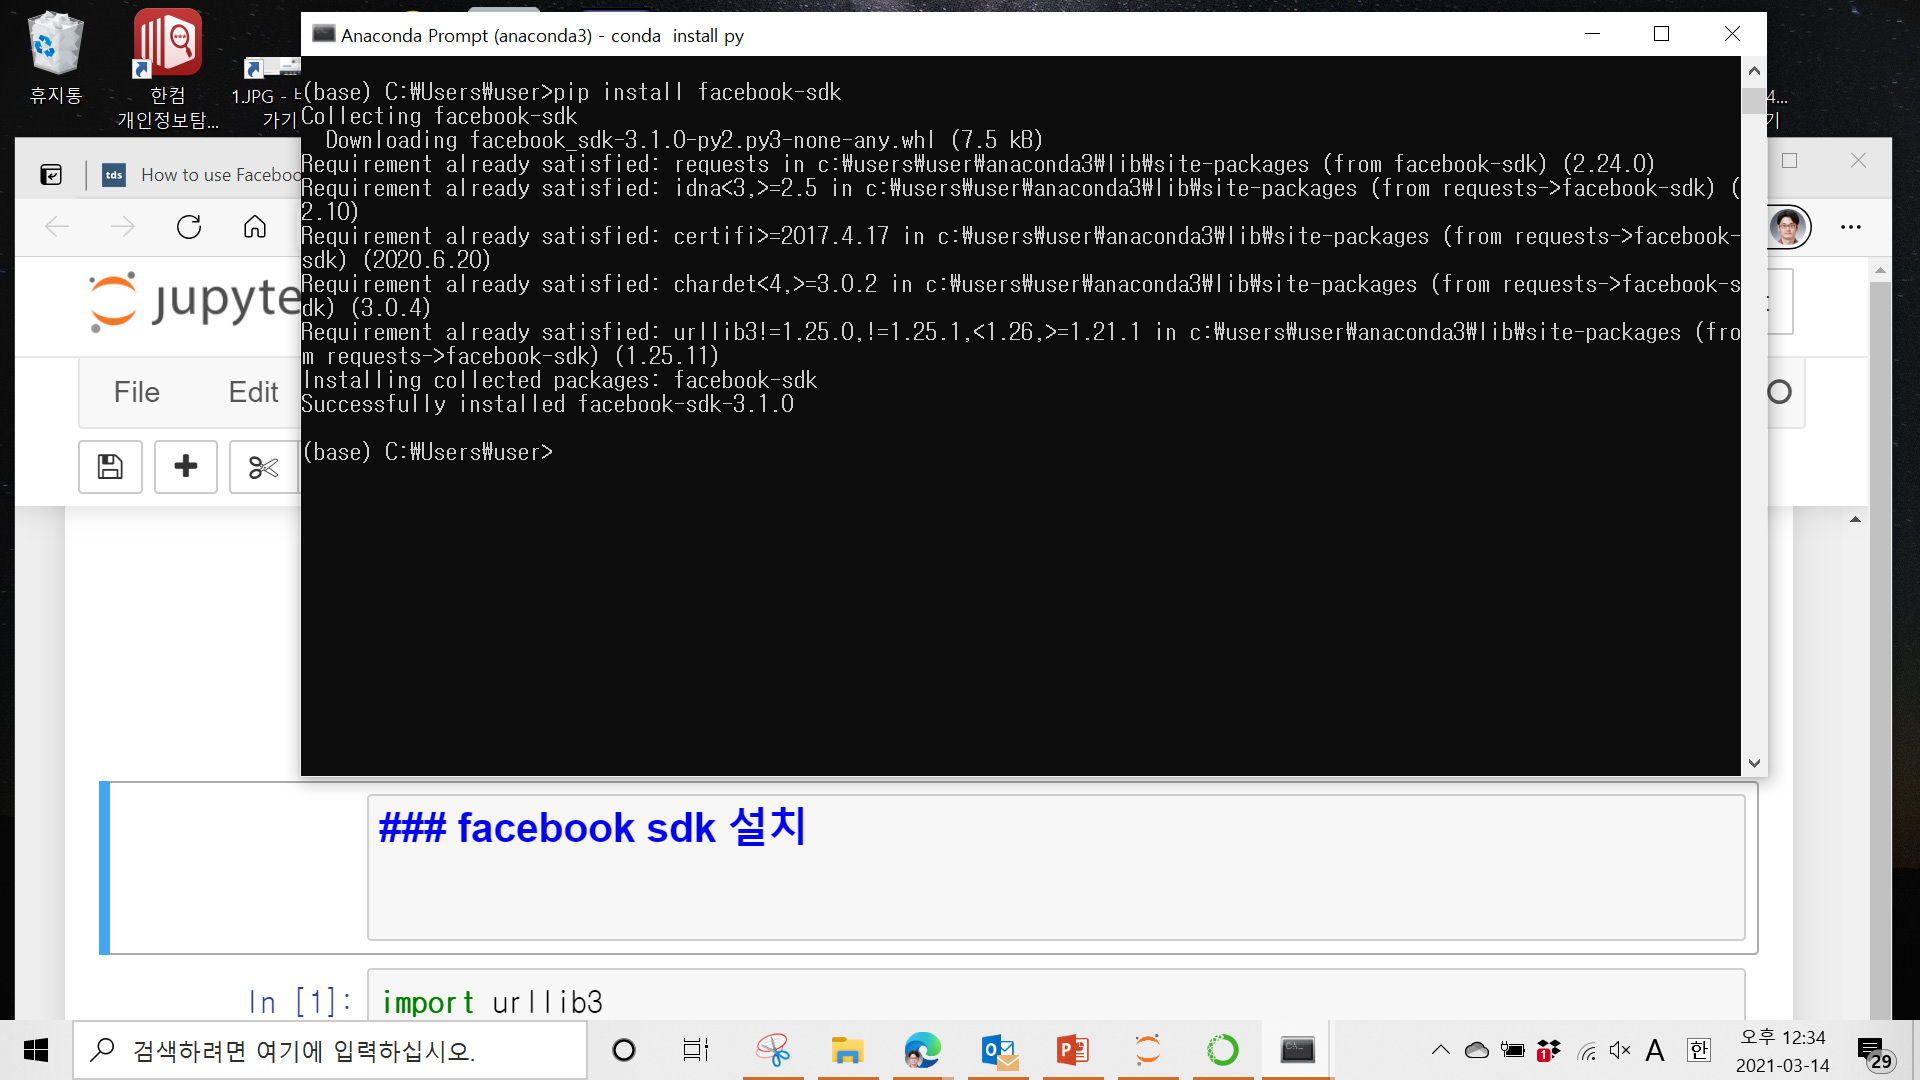

- 메뉴 : Kernel - Restart 필요


### api  활용 python code 

- 참조 문서 : 

https://developers.facebook.com/docs/graph-api

https://facebook-sdk.readthedocs.io/en/latest/api.html


### api code test


In [1]:
import urllib3
import facebook
import requests


token='EAAHiWtZCvvAYBALGn1eGuJNZCYhHOvwZAe8uxC6kGXgTwPClsFDP55buMmEq0DuADsbv4EhHjmwCki1elDu3o494U4oLip9S1Yx94Ayi0F9dtV97881svDWSgoE3j1YdaTZB1QU8E4tXuSPO5XPL4t5jCGsNdZAAPIRL7d0qdHSHjlUgum0CuNZAn612pdUsfixOZAHx7gUgQZDZD'
graph = facebook.GraphAPI(access_token=token)
profile = graph.request('/me?fields=id,name,email')

print (profile)

{'id': '998461491082891', 'name': '김성연', 'email': '20171421@soongsil.ac.kr'}
